<span style="color: black;">

# Analyzing E-Commerce Trends (Flipkart)

### Problem Statement - 
The aim is to analyze the Flipkart sales dataset to understand customer preferences, product performance, and sales trends. The analysis will focus on identifying the most popular categories, brands, pricing strategies, and customer ratings.

### Why is it important to solve it?
Solving this problem will help Flipkart make data-driven decisions to improve product listings, pricing strategies, and customer satisfaction. The insights gained from this analysis could lead to increased sales, better customer retention, and improved overall business performance.



In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Uploading the data
df= pd.read_csv("flipkart_com-ecommerce_sample.csv")

In [4]:
#checking the data
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
#checking the shape
df.shape


(20000, 15)

In [11]:
#understanding the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [9]:
#checkig total null values
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [12]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [13]:
df.duplicated().sum()

0

In [14]:
#filling null values of column retail_price and discounted price using median method
df["retail_price"].fillna(df["retail_price"].median(), inplace=True)
df["discounted_price"].fillna(df["discounted_price"].median(), inplace=True)

In [15]:
#since the name of the brand is the first word of product name, so filling the null values opf brand name with it
df["brand"].fillna(df["product_name"].str.split().str[0], inplace=True)

In [17]:
#Since the data loss is very less, less than 1% so sropping the null values form columns image, description and product specification
df.dropna(subset=['image', 'description', 'product_specifications'], inplace=True)

In [19]:
#Checking null values
df.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

## Category Analysis

In [21]:
#checking for unique values
df['product_category_tree'].unique()

array(['["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]',
       '["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]',
       '["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]',
       ...,
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Fun To See Stickers"]'],
      dtype=object)

In [38]:
# Making a new column  product_category_1 by splitting the column product category tree
df['product_category_1']=df['product_category_tree'].str.split('>>').str[0]


In [44]:
#top 5 categories
df['product_category_1'] = df['product_category_1'].str.replace('[', '',regex=False).str.replace('"', '',regex=False)
top_categories=df['product_category_1'].value_counts()[:5]
top_categories

Clothing                  6192
Jewellery                 3530
Footwear                  1225
Mobiles & Accessories     1098
Automotive                1012
Name: product_category_1, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

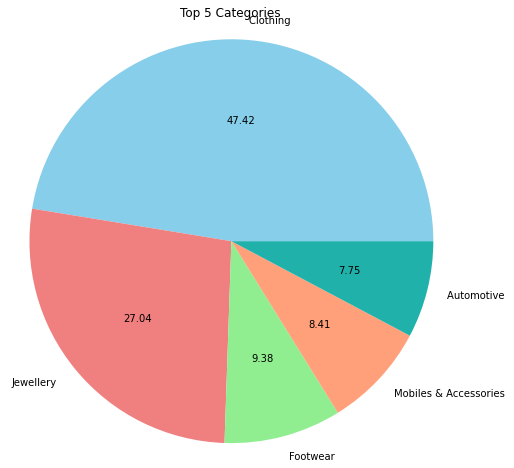

In [45]:
#Potting a pie plot to show top 5 categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories,labels=top_categories.index,autopct='%.2f', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen'])
plt.title('Top 5 Categories')
plt.axis('equal')
plt.show

## Brand Popularity


In [46]:
#Top 5 brands
top_brands=df['brand'].value_counts().head()
print(top_brands)


Allure Auto     469
Regular         313
Voylla          299
Slim            288
TheLostPuppy    229
Name: brand, dtype: int64


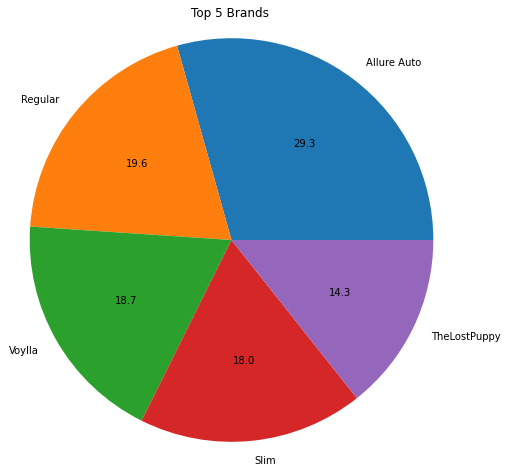

In [47]:
#Plotting a pie plot for top 5 brands
plt.figure(figsize=(8,8))
plt.pie(top_brands,labels=top_brands.index,autopct='%.1f')
plt.title("Top 5 Brands")
plt.axis('equal')
plt.show()

## Pricing Strategy

In [48]:
#Making a new column- discount percentage
a=(df["retail_price"]-df["discounted_price"])
b=(a/df["retail_price"])*100
df["discount_percentage"]=b

In [50]:
#Average of Discounted Percentage
average_discount=df["discount_percentage"].mean()
average_discount

40.54890916753178

## Product Ratings

In [52]:
#Finding the number of products with rating and counting it.
rated_products = df[df['product_rating'] != 'No rating available']
count_of_rated_product = rated_products['product_rating'].count()
count_of_rated_product

1849

## Flipkart Advantage Analysis 

In [53]:
#Mean of true value
Adv_true=(df["is_FK_Advantage_product"].mean())*100
Adv_true

3.928732295680897

## Most Expensive Products

In [56]:
#Finding most expensive products and its retail price
top_3_expensive_products = df.nlargest(3, 'retail_price')
top_3_product_info = top_3_expensive_products[['product_name', 'retail_price']]
top_3_product_info

,product_name,retail_price
116,Breitling AB011010/BB08 131S Chronomat 44 Anal...,571230.0
11631,Durian Leather 2 Seater Sofa,250500.0
11507,Durian Laze/3 Leather 3 Seater Sofa,217500.0


## Brand-Wise Rating

In [58]:
#replacing the no rating available to 0
df['temp_product_rating']=df['product_rating'].replace('No rating available',0)

In [59]:
#Highest brand average rating
df['ab_product_rating'] = pd.to_numeric(df['product_rating'], errors='coerce')
brand_ratings = df.groupby('brand')['ab_product_rating'].mean()
highest_rated_brand = brand_ratings.idxmax()
highest_average_rating = brand_ratings.max()
print(highest_rated_brand)

3wish


## Category-Wise pricing

In [66]:
#category wise average pricing
average_prices = df.groupby('product_category_1')['retail_price'].mean()
highest_avg_price_category = average_prices.idxmax()
print(highest_avg_price_category)

Furniture 


## Product Description

In [67]:
# Findin the index of longest description and shortest description and then finding the product name
df['description_length'] = df['description'].apply(len)
index_longest = df['description_length'].idxmax()
index_shortest = df['description_length'].idxmin()

print("Product with the longest description:")
print(df.loc[index_longest, 'product_name'])

print("Product with the shortest description:")
print(df.loc[index_shortest, 'product_name'])

Product with the longest description:
Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterling Silver, Metal, Alloy Cat's Eye NA K Ring
Product with the shortest description:
Klick Women's Leggings


## Time Analysis

In [70]:
#converting it to date time format
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])

In [71]:
##month in which data mostly crawled
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%B')
most_crawled_month = df['month'].value_counts().idxmax()
most_crawled_month

'December'